### Instalação de pacotes

In [1]:
# Instala bibliotecas necessárias
%pip install -qr requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Instanciação do modelo

In [1]:
# Importa biblioteca para treino do Dmoz-Sports e classic4
from exercicio10 import MyBert

### Treinamento da base Dmoz-Sports

In [3]:
# Dmoz-Sports
base_dados = 'Dmoz-Sports'
arquivo_csv = f'../aula_3/atividade_3/in/{base_dados}.csv'
modelo = 'bert-base-uncased'

# Cria instância do modelo
dmoz_sports = MyBert(modelo)

In [4]:
# Carrega dados (treino, validação e teste)
dmoz_sports.carregar_csv(arquivo_csv)

In [5]:
# Exibe tokenização
dmoz_sports.imprimir_amostra()


Texto de amostra  : Emporia State University Women's Softball Hornets. Contains scores, coaching staff, game summaries, pictures, articles, and a questionnaire. 
Amostra em tokens: ['em', '##por', '##ia', 'state', 'university', 'women', "'", 's', 'softball', 'hornets', '.', 'contains', 'scores', ',', 'coaching', 'staff', ',', 'game', 'sum', '##mar', '##ies', ',', 'pictures', ',', 'articles', ',', 'and', 'a', 'question', '##naire', '.']
Tokens IDs       : [101, 7861, 17822, 2401, 2110, 2118, 2308, 1005, 1055, 12585, 24855, 1012, 3397, 7644, 1010, 7748, 3095, 1010, 2208, 7680, 7849, 3111, 1010, 4620, 1010, 4790, 1010, 1998, 1037, 3160, 20589, 1012, 102]


In [7]:
# Treina modelo
from transformers import TrainingArguments

dmoz_sports.treinar(TrainingArguments(
    output_dir='./out',
    num_train_epochs=3,
    per_device_train_batch_size=80,
    per_device_eval_batch_size=80,
    evaluation_strategy='epoch',
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    load_best_model_at_end=True,
))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.671800,0.567736,0.905115,0.905115,0.907218
2,0.374400,0.376102,0.914010,0.914010,0.915224
3,0.235300,0.349065,0.916976,0.916976,0.917818


In [7]:
# Métricas no conjunto de teste
resultado = dmoz_sports.modelo_treinado.predict(dmoz_sports.ds_teste)
print("\nResultados da avaliação do teste:")
print(f"Acurácia: {resultado.metrics['test_accuracy']:.4f}")
print(f"F1 Micro: {resultado.metrics['test_f1_micro']:.4f}")
print(f"F1 Macro: {resultado.metrics['test_f1_macro']:.4f}")


Resultados da avaliação do teste:
Acurácia: 0.9382
F1 Micro: 0.9382
F1 Macro: 0.9373


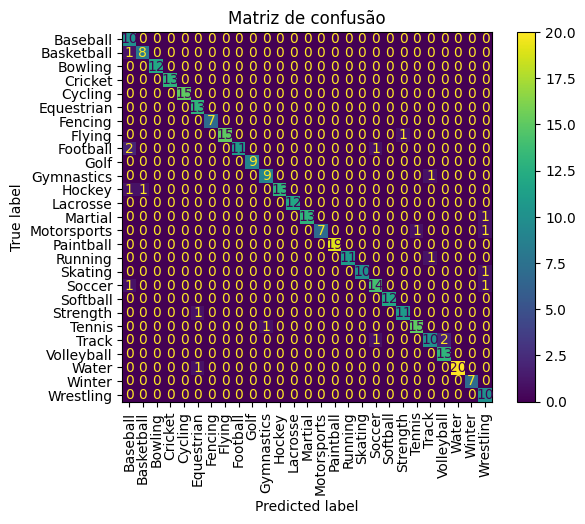

In [8]:
# Matriz de confusão
dmoz_sports.matriz_confusao(resultado)

### Treinamento da base classic4

In [9]:
# classic4
base_dados = 'classic4'
arquivo_csv = f'../aula_3/atividade_3/in/{base_dados}.csv'
modelo = 'bert-base-uncased'

In [10]:
# Cria instância do modelo
classic4 = MyBert(modelo)

In [11]:
# Carrega dados (treino, validação e teste)
classic4.carregar_csv(arquivo_csv)

In [12]:
# Exibe tokenização
classic4.imprimir_amostra()


Texto de amostra  : Comments on Moorer's Music and Computer Composition 
Amostra em tokens: ['comments', 'on', 'moore', '##r', "'", 's', 'music', 'and', 'computer', 'composition']
Tokens IDs       : [101, 7928, 2006, 5405, 2099, 1005, 1055, 2189, 1998, 3274, 5512, 102]


In [13]:
# Treina modelo
from transformers import TrainingArguments

classic4.treinar(TrainingArguments(
    output_dir='./out',
    num_train_epochs=3,
    per_device_train_batch_size=80,
    per_device_eval_batch_size=80,
    evaluation_strategy='epoch',
    logging_dir='./logs',
    logging_steps=10,
    save_strategy='epoch',
    load_best_model_at_end=True,
))

/Users/thyarles/SPAI/unb-fmc-nlp/venv/lib/python3.13/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.053700,0.037261,0.991537,0.991537,0.991699
2,0.028700,0.018248,0.995769,0.995769,0.996253
3,0.008700,0.012007,0.995769,0.995769,0.996253


In [14]:
# Métricas no conjunto de teste
resultado = classic4.modelo_treinado.predict(classic4.ds_teste)
print("\nResultados da avaliação do teste:")
print(f"Acurácia: {resultado.metrics['test_accuracy']:.4f}")
print(f"F1 Micro: {resultado.metrics['test_f1_micro']:.4f}")
print(f"F1 Macro: {resultado.metrics['test_f1_macro']:.4f}")


Resultados da avaliação do teste:
Acurácia: 0.9923
F1 Micro: 0.9923
F1 Macro: 0.9924


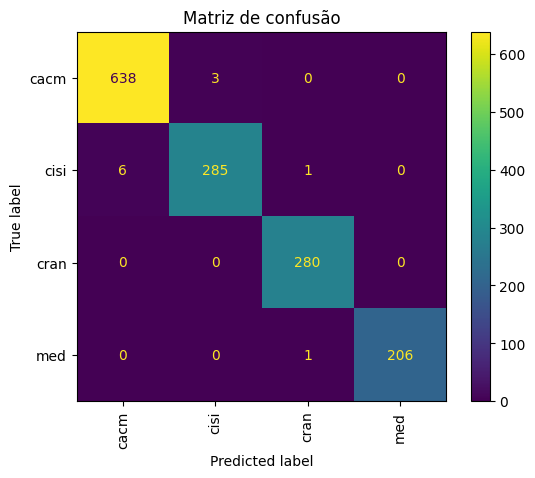

In [15]:
# Matriz de confusão
classic4.matriz_confusao(resultado)

### Código usado para agilizar o debug

In [13]:
import pickle

with open('./out/dmoz.pickle', 'wb') as file:
        pickle.dump(dmoz_sports, file)

In [5]:
import pickle

with open('./out/dmoz.pickle', 'rb') as file:
        dmoz_sports = pickle.load(file)